In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load MNIST dataset
mnist = tfds.load(name="mnist", as_supervised=True, split = "train")

In [14]:
num_classes = 10  # MNIST has 10 classes (digits 0-9)

def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=num_classes)  # Convert label to one-hot
    return image, label

# Apply one-hot encoding to the dataset
mnist = mnist.map(one_hot_encode)

In [6]:
# !pip install tensorflow-datasets


In [15]:
mnist

<_MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>

In [17]:
print(mnist.element_spec)


(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))


In [18]:
import numpy as np
from matplotlib import pyplot as plt

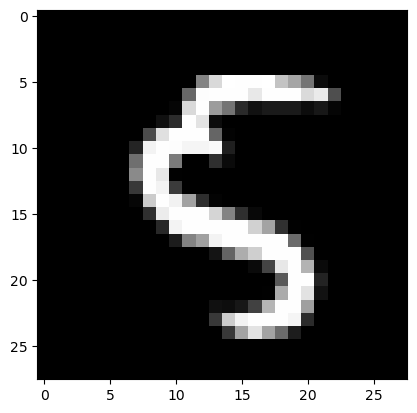

In [24]:
# first_image = mnist.train.images[0]
# first_image = np.array(first_image, dtype = 'float')
# first_image = first_image.reshape((28,28))
# plt.imshow(first_image)
# plt.show()


# Extract the first image and label
for image, label in mnist.take(234):  
    first_image = image.numpy()  # Convert Tensor to NumPy array

# Reshape and display
first_image = first_image.reshape((28, 28))
plt.imshow(first_image, cmap="gray")
plt.show()

In [27]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1' : tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random.normal([n_hidden_1, n_classes]))
}
biases = {
    'h1' : tf.Variable(tf.random.normal([ n_hidden_1])),
    'h2' : tf.Variable(tf.random.normal([ n_hidden_2])),
    'out' : tf.Variable(tf.random.normal([ n_classes]))
}

In [28]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h2'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [30]:
# x = tf.keras.Input(shape=(n_input,))
# y = tf.keras.Input(shape=(n_classes,))
# pred = forward_propagation(x, weights, biases)
# predictions = tf.argmax(pred, axis=1)
# correct_labels = tf.argmax(y, axis=1)

# # Initialize the model and perform predictions
# model = tf.keras.Model(inputs=[x, y], outputs=predictions)

# # In TensorFlow 2.x, we no longer need a session. We can directly use the model.
# # Replace the session.run() with model prediction
# predictions_eval = model.predict(x=tf.mnist.test.images)
# all other code is in notes